In [3]:
# === 1. Import libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, classification_report, accuracy_score

In [4]:
# === 2. Load final dataset and model ===
df = pd.read_csv('../data/final/final_dataset.csv')
rf_model = joblib.load('../data/final/nba_rf_model.pkl')

print(f"✅ Data and model loaded successfully. Dataset shape: {df.shape}")

✅ Data and model loaded successfully. Dataset shape: (72008, 109)


In [9]:
# === 3. Define target and features ===
y = df['home_win']

# Drop identifiers or non-predictive columns
drop_cols = ['home_win', 'score_diff', 'gameId']
X = df.drop(columns=drop_cols, errors='ignore')

# Remove potential data leakage columns (columns that reveal outcome)
leakage_cols = [col for col in X.columns if any(word in col.lower() for word in ['win', 'plusminus', 'diff_points'])]
X = X.drop(columns=leakage_cols, errors='ignore')

# Keep only numeric columns
X = X.select_dtypes(include=['int64', 'float64', 'bool'])

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

print(f"✅ Features ready for evaluation — {X.shape[1]} numeric columns")
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

✅ Features ready for evaluation — 87 numeric columns
Train size: (57606, 87), Test size: (14402, 87)


In [10]:
# === 4. Split ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [11]:
# === 5. Evaluate model ===
y_pred = rf_model.predict(X_test)

print("\n📊 Model Performance")
print("------------------")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Model Performance
------------------
Accuracy: 0.9601

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      4862
           1       0.95      0.99      0.97      9540

    accuracy                           0.96     14402
   macro avg       0.97      0.94      0.95     14402
weighted avg       0.96      0.96      0.96     14402



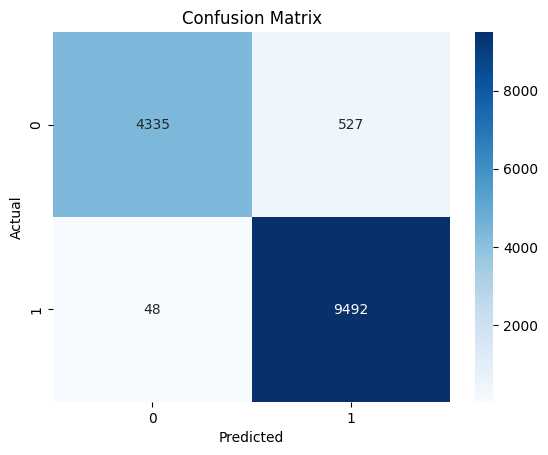

In [12]:
# === 6. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/Users/valenkloster/Desktop/NBA DATASET/venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


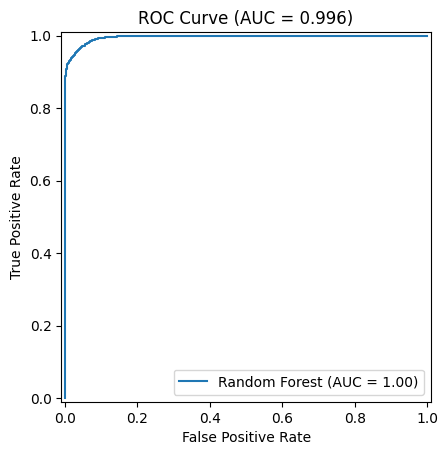

In [13]:
# === 7. ROC Curve ===
y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title(f'ROC Curve (AUC = {roc_auc:.3f})')
plt.show()